In [1]:
from cluster import kmeans_and_save
from rank_clusters import show
from visualization import clusters_years, graph_kmeans_pca, graph_kmeans_tsne
from utility import read_h5_as_dataframe
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
Mode = 'AE'

database_path=f'database/Pink_{Mode}.h5'
output_csv_path = f'database/Pink_{Mode}.csv'

n_pca=10
n_clusters=11
cluster_label=f"Cluster"

128 model
clusters 大于 10后，会单独列出speak to me，离群

In [3]:
kmeans_and_save(filepath=database_path, output_path=database_path, n_pca=n_pca, n_tsne=3, n_clusters=n_clusters, Mode=Mode)

df = read_h5_as_dataframe(database_path)
df.to_csv(output_csv_path, index=False)

Data loaded successfully


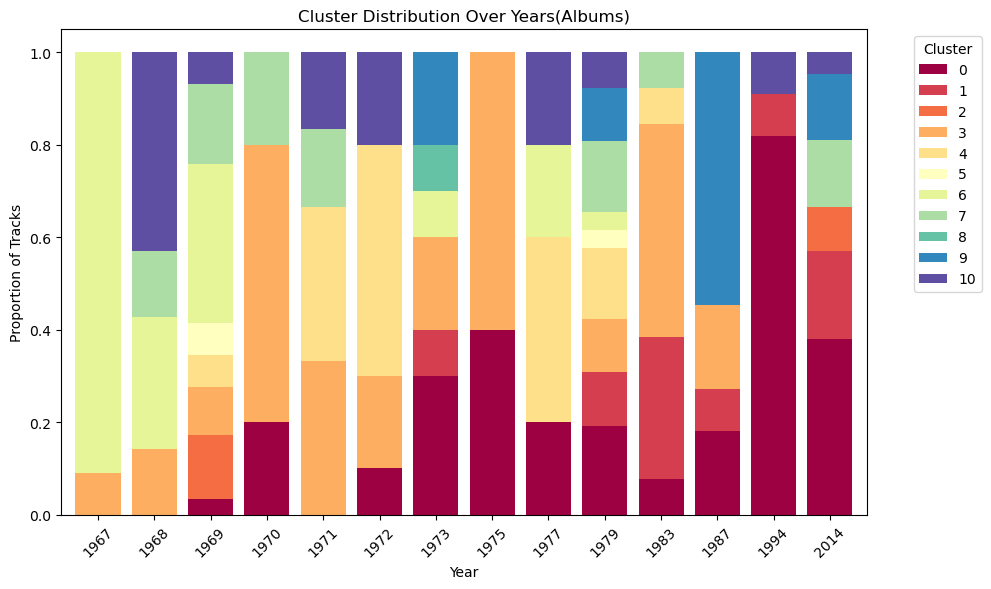

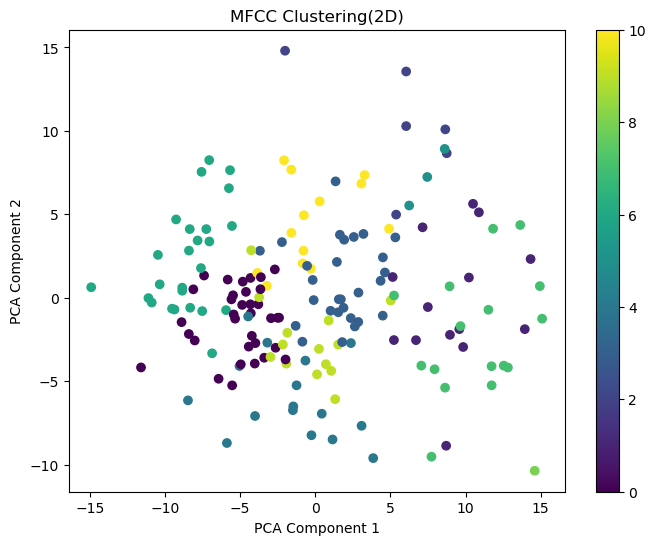

In [4]:
clusters_years(df,cluster_label=cluster_label)
graph_kmeans_pca(df, cluster_label=cluster_label, n_pca=n_pca, graph_3d=False)
# Graph.graph_kmeans_tsne(df, graph_3d=False)

In [5]:
show(df, 'analyze/cluster_result.txt', Mode=Mode)

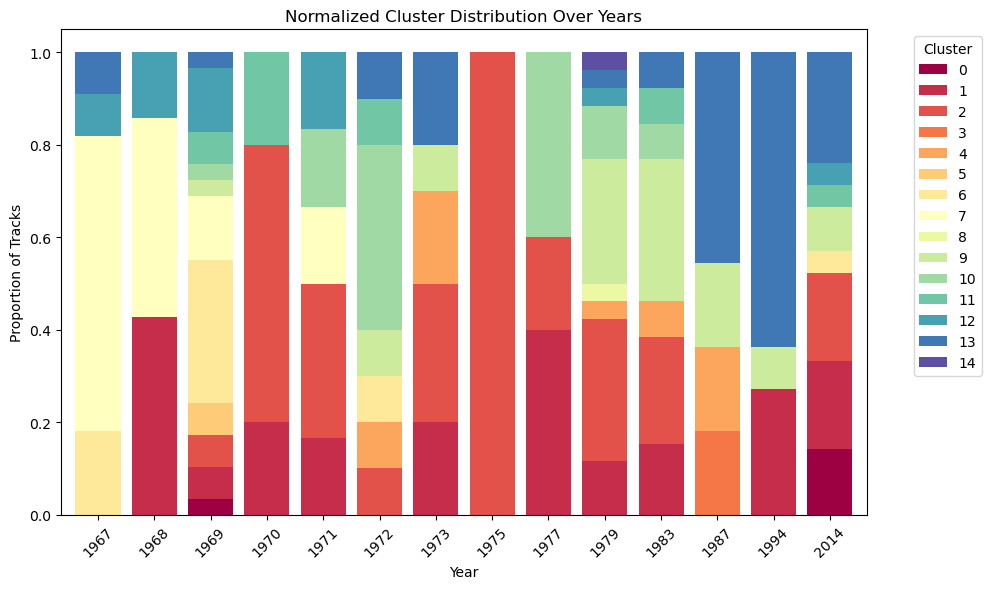

## Average Song

In [6]:
AE_values=np.stack(df[f"PCA_{n_pca}"])
# AE_values=np.stack(df["AE"])

avg_AE=np.mean(AE_values, axis=0)

distances = np.linalg.norm(AE_values - avg_AE, axis=1)

closest_indices = np.argsort(distances)[:15]
# closest_indices = np.argsort(distances)[-15:]

closest_songs = df.iloc[closest_indices][['Song', 'Album', 'Year']]

print(closest_songs)
# print("Distances:\n", distances[closest_indices])

closest_songs.to_csv("analyze/avg_songs.csv")

                                     Song                        Album  Year
100                                Echoes                       Meddle  1971
1    Shine On You Crazy Diamond, Pts. 1-5           Wish You Were Here  1975
67                  Waiting for the Worms                     The Wall  1979
15                                 Mudmen           Obscured by Clouds  1972
32                 Wearing the Inside Out            The Division Bell  1994
102                              Fearless                       Meddle  1971
3    Shine On You Crazy Diamond, Pts. 6-9           Wish You Were Here  1975
72                              The Trial                     The Wall  1979
51                      The Hero's Return                The Final Cut  1983
133                                  Time    The Dark Side Of The Moon  1973
151                     Atom Heart Mother            Atom Heart Mother  1970
74                           In the Flesh                     The Wall  1979